<a href="https://colab.research.google.com/github/budatasci/ai-ml-workshop/blob/main/notebooks/03_model_development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Selection
Authors: Wei Mai, Christina Xu

In [ ]:
# connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# data manipulation
import numpy as np

# model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

# k-fold cross validation
from sklearn.model_selection import cross_val_score

# models 
from sklearn import tree 
from sklearn.ensemble import RandomForestClassifier

# data visualization
import matplotlib.pyplot as plt

# save model
import pickle

# 1 Model training 

While there are several classifiers available, we show how to train the following classifiers, compare and select one.

1. [Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
2. [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

## 1.1 Load training and testing data

In [ ]:
# load data from the data/testtrain folder
data_path = '...'

X_train_prepared = np.loadtxt(data_path + "X_train_prepared.csv", delimiter=",")
X_test_prepared = np.loadtxt(data_path + "X_test_prepared.csv", delimiter=",")
y_train_prepared = np.loadtxt(data_path + "y_train_prepared.csv", delimiter=",")
y_test_prepared = np.loadtxt(data_path + "y_test_prepared.csv", delimiter=",")

## 1.1 Decision Tree
https://scikit-learn.org/stable/modules/tree.html

A tree where each node represents a feature, each branch represents a decision and each leaf represents an outcome.

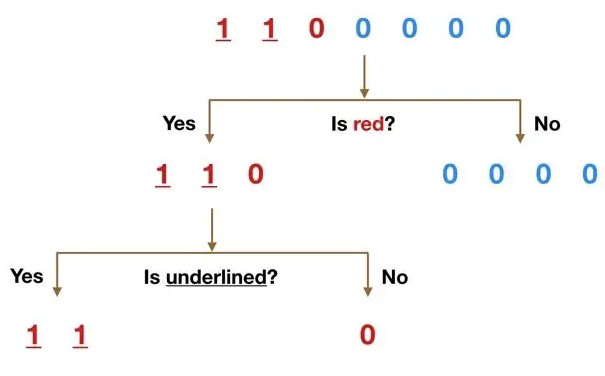

In [ ]:
# model training

# initalize decision tree object
dtc = tree.DecisionTreeClassifier(random_state=0) #random_state ensures reproducibility

# train the decision tree on the training set 
decision_tree = dtc.fit(X_train_prepared, y_train_prepared)

## 1.2 Random Forest 
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier

 A large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction. 

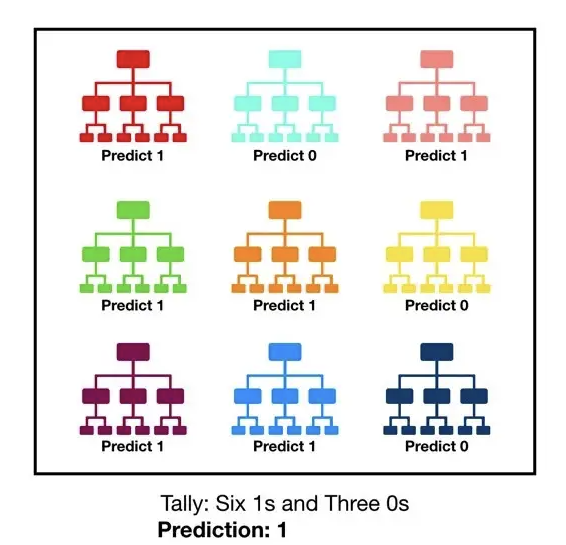

In [ ]:
# model training

#initalize Random Forest object
rfc = RandomForestClassifier(random_state=0) #random_state ensures reproducibility

# train the decision tree on the training set 
random_forest = rfc.fit(X_train_prepared, y_train_prepared)

# 2 Model evaluation

1. Accuracy - number of correct predictions / number of total predictions
2. Cross Validation (CV) - a resampling method that uses different portions of the data to test and train a model on different iterations, minimizes bias and ensures generalization
3. Root Mean Squared Error (RMSE) - how far predictions fall from measured true values using Euclidean distance

## 2.1 Initalize function to evaluate model

In [ ]:
def evaluate_model(model):
    """
    Evaluate the model using accuracy and RMSE
    :param 1 model: a classification model
    :returns: the accuracy, cross-validated accuracy, and RMSE of the model
    """
    print (f'Evaluation metrics for {model.__class__.__name__}:')
    accuracy = model.score(X_train_prepared,y_train_prepared)
    cross_validation = cross_val_score(model, X_train_prepared, y_train_prepared, cv=3, scoring='accuracy')
    y_pred = model.predict(X_train_prepared)
    rmse = mean_squared_error(y_train_prepared, y_pred)
    print (f'Accuracy: {accuracy}' + f'\nCross validation score: {cross_validation}' + f'\nRMSE: {rmse}')

In [ ]:
# model evaluation 
eval_metrics0 = evaluate_model(decision_tree)

In [ ]:
# model evaluation
eval_metrics1 = evaluate_model(random_forest)

Based on the evaluation metrics, which model would you choose?

# 3 Model Testing 

In [ ]:
y_pred = rfc.predict(X_test_prepared)

In [ ]:
# evaluate the final model on testing data
print (f'Accuracy : {rfc.score(X_test_prepared,y_test_prepared):.3f}')
rmse = str(mean_squared_error(y_test_prepared, y_pred, squared=False))
print(f'RMSE:' + rmse)

In [ ]:
# save model for future refinement
model_path   = '...'
pickle.dump(rfc, open(model_path + 'rfc.pkl', 'wb'))

# Summary:

In this notebook, you learned how to use ML models to train on the dataset with scikit-learn.

<ul>
    <li> DecisionTree </li>
    <li> RandomForest Algorithm </li>
</ul>

RandomForest is a better version of DecisionTree to solve overfitting problem. <b>Why?</b>

* DecisionTree will just keep on building more depth of the tree which leads to overfitting...

* RandomForest has multiple DecisionTrees to make predictions, then we take the majority vote based on their results.

You will come across RandomForest algorithm many times in your Data Science journey. Most of the classification or regression problems can be solved by easier ML algorithms such as RandomForest.

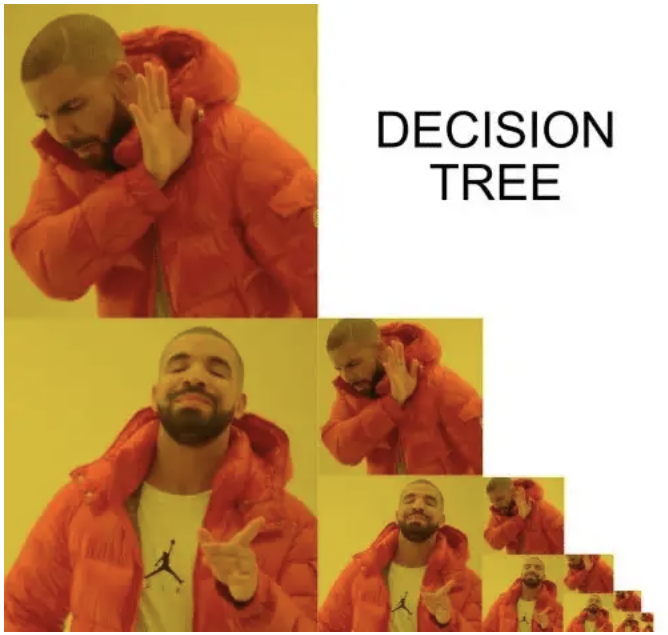